In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sp
import scipy.optimize as op
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, Ridge

### Visualizing the data

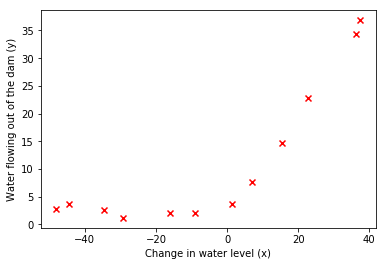

In [4]:
path="H:/assignments/machine_learning/mex5/machine-learning-ex5/ex5/ex5data1.mat"
data=sp.loadmat(path)
X=data['X']
y=data['y']
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)') 
plt.scatter(X,y,marker='x',c='r',linewidths=1.5)
plt.show()

### Calculating cost and gradients

In [5]:
plt.close('all')
def compute_cost_li_reg(theta,X, y,lam):
    theta= np.reshape(theta,(len(theta),1))
    m=X.shape[0]
    h=X.dot(theta)
    return np.sum(np.square(y-h))/(2*m)+(lam/(2*m))*np.sum(np.square(theta[1:]))
def grad_li_reg(theta,X,y,lam):
    theta= np.reshape(theta,(len(theta),1))
    m=X.shape[0]
    h=X.dot(theta)
    grad=(X.T.dot(h-y))/(X.shape[0])+(lam/m)*np.sum(theta[1:])
    return grad

In [6]:
X.shape,y.shape

((12, 1), (12, 1))

In [7]:
theta=np.ones((2))
XX=np.c_[np.ones((X.shape[0],1)),X]
cost=compute_cost_li_reg(theta,XX, y,1)
grad=grad_li_reg(theta,XX, y,1)
cost,grad


(303.99319222026429, array([[ -15.21968234],
        [ 598.25074417]]))

### Training linear regression

In [8]:
def train_linear_regression(XX,y,lam=0, initial_theta = np.zeros((2))):  
    Result = op.minimize(fun=compute_cost_li_reg, x0 = initial_theta, args = (XX,y,lam),\
                         method = 'TNC',jac = grad_li_reg,options={'maxiter':5000})
    opt_theta=Result.x
    return opt_theta

In [9]:
lam=0
opt_theta=train_linear_regression(XX,y,lam)
opt_theta.shape

(2,)

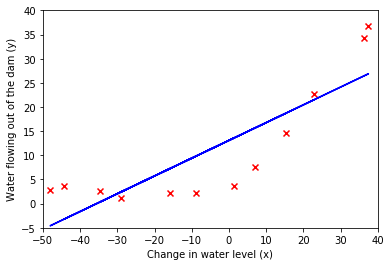

In [10]:
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)') 
z=opt_theta[0]+opt_theta[1]*X
plt.plot(X,z,c='b')
plt.scatter(X,y,marker='x',c='r',linewidths=1.5)
plt.ylim(-5,40)
plt.xlim(-50,40)
plt.show()

In [11]:
plt.close('all')

### Plotting learning curves

In [12]:
def learningCurve(X, y, Xval, yval, lam,theta=np.zeros((2))):
    m = y.size
    
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    for i in np.arange(m):
        res = train_linear_regression(X[:i+1], y[:i+1], lam,theta)
        error_train[i] = compute_cost_li_reg(res, X[:i+1], y[:i+1], lam)
        error_val[i] = compute_cost_li_reg(res, Xval, yval, lam)
    
    return(error_train, error_val)

[  1.01769539e-18] [ 205.12109571]
[  3.46713088e-09] [ 110.30264078]
[ 3.28659505] [ 45.01023145]
[ 2.84267769] [ 48.36891025]
[ 13.15404881] [ 35.86516474]
[ 19.44396251] [ 33.82996155]
[ 20.09852166] [ 31.97098583]
[ 18.1728587] [ 30.86244631]
[ 22.60940542] [ 31.13599786]
[ 23.26146159] [ 28.93620747]
[ 24.31724959] [ 29.55143162]
[ 22.3739065] [ 29.43381813]


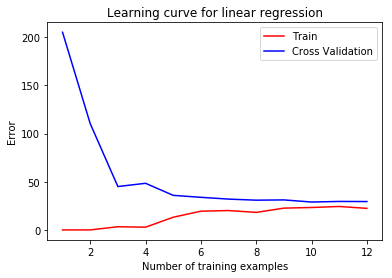

In [13]:
Xval=data['Xval']
yval=data['yval']
lam=0
z=learningCurve(np.c_[np.ones((X.shape[0], 1)),X],y,np.c_[np.ones((Xval.shape[0], 1)),Xval],yval,lam) 
error_train=z[0]
error_val=z[1]
for i in range(error_train.shape[0]):
     print(error_train[i],error_val[i])
xvalues=np.linspace(1,X.shape[0],12)
# print(xvalues,X.shape[0])
# print(xvalues.shape,error_train.shape)
a,=plt.plot(xvalues, error_train,c='red')
b,=plt.plot(xvalues, error_val,c='blue')
plt.title('Learning curve for linear regression')
plt.legend((a,b),('Train','Cross Validation'),loc=1)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
# plt.axis([0,13,0,150])
plt.show()

In [14]:
plt.close('all')

### Feature Mapping for Polynomial Regression

In [15]:
poly = PolynomialFeatures(degree=8)
X_train=np.c_[np.ones((X.shape[0],1)),X]
X_train_poly = poly.fit_transform(X_train[:,1].reshape(-1,1))
X_train_poly.shape

(12, 9)

In [16]:
# Normalizing features
X_train_poly=normalize(X_train_poly)

In [17]:
#training linear regression model
opt_theta=train_linear_regression(X_train_poly,y,lam=0, initial_theta = np.zeros((9)))
opt_theta

array([ -2.91565857e+06,  -2.30633677e+06,  -1.84810806e+06,
         3.61807468e+06,   1.27050272e+05,  -9.04339169e+04,
        -3.27523930e+03,   4.90996265e+02,   1.90569432e+01])

In [18]:
z=np.sum(np.multiply(np.c_[opt_theta].T,X_train_poly),axis=1)
z

array([ -3.95201639,   2.01110555,  28.3361703 ,  28.20932037,
         8.24480795,   3.05257342,  18.36612778,   4.36677248,
         3.74018339,   7.37575062,   7.19735998,  27.6629258 ])

### Plotting 

In [19]:
plt.close('all')

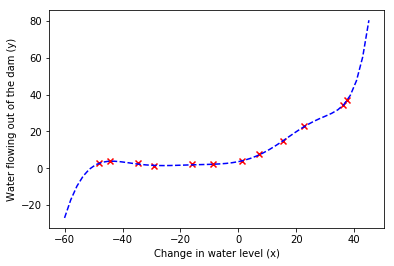

In [20]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train[:,1].reshape(-1,1))
n_points_to_plot = 12
plot_x = np.linspace(-60,45)
regr2 = LinearRegression()
regr2.fit(X_train_poly, y)
regr2.coef_.shape
plot_y = regr2.intercept_+ np.sum(regr2.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)') 
plt.scatter(X,y,marker='x',c='r',linewidths=1.5)
plt.plot(plot_x,plot_y,'b--')
plt.show()

In [21]:
plt.close('all')